In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Functions


Without loss of generality assume that the point we want of find the FD coefficients is at $x=0$.
Let the grid points be $x_i$. Now, Taylor formula gives us:

\begin{equation}
    f_i=f(x_i) = \sum_{n=0} f^{n}(0) \frac{x_i^n}{n!}
\end{equation}

Note that if we can represent the relation between $f(x_i)$ and $f^{n}(0)$ as a simple matrix equation $f_i = M_{in} f^n(0)$, where 

\begin{equation}
    M_{in}= \frac{x_i^n}{n!} = \begin{bmatrix}
        	1 & x_0 & \frac{x_0^2}{2!} & \cdots\\
            1 & x_1 & \frac{x_1^2}{2!} & \cdots \\
            \vdots & \vdots & \vdots & \ddots
        \end{bmatrix}
\end{equation}

Now we can simply invert the matrix $M$ and get the result. 

In [54]:
def differentiation_matrix_1d(points_list:np.ndarray) -> np.ndarray:
    n = len(points_list)
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i,j] = np.math.pow(points_list[i],j)/np.math.factorial(j)
    return np.linalg.inv(D)

def differentiation_matrix_1d2(points_list:np.ndarray) -> np.ndarray:
    n = len(points_list)
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i,j] = np.math.pow(points_list[i],j)
    
    return np.diag([np.math.factorial(i) for i in range(n)])@np.linalg.inv(D)

In [101]:
def vander_det(pts:np.ndarray):
  determinent = 1
  for i in range(len(pts)):
      for j in range(i):
          determinent *= pts[i] - pts[j]
  return determinent
            

In [105]:
n = 5
points_list = np.arange(-n,n+1)/(n/2)
# points_list = np.arange(-n,n+1)
n = len(points_list)
D = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        D[i,j] = np.math.pow(points_list[i],j)

print(np.linalg.det(D),vander_det(points_list))

864336.5512217399 864336.5512216596


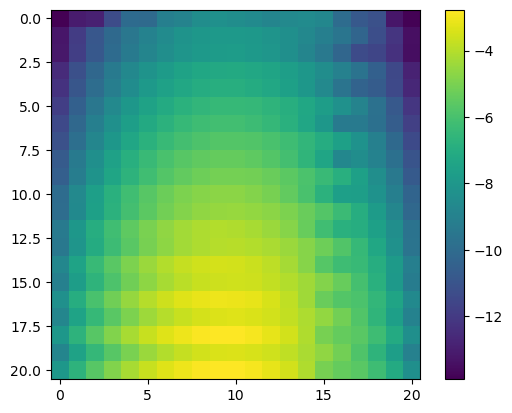

In [100]:
n = 10
pts = np.arange(-n,n+1)
a = differentiation_matrix_1d(pts)
b = differentiation_matrix_1d2(pts)
plt.imshow(np.log10(np.abs(a-b)))
plt.colorbar()

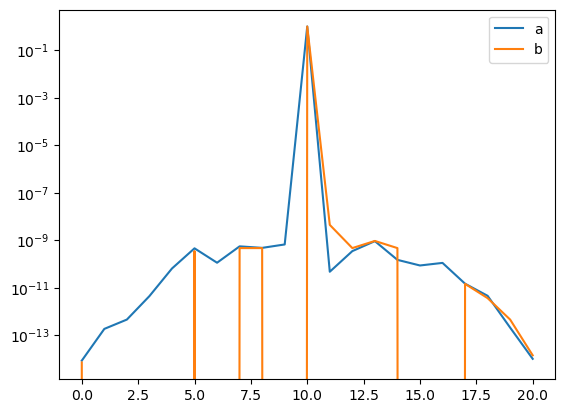

In [99]:
plt.semilogy(np.abs(a[0,:]),label='a')
plt.semilogy(np.abs(b[0,:]),label='b')
plt.legend()

/tmp/ipykernel_2166726/625023803.py:6: RuntimeWarning: divide by zero encountered in log10
  aa,aa_inv = np.log10(np.abs(a)),np.log10(np.abs(inv_a))


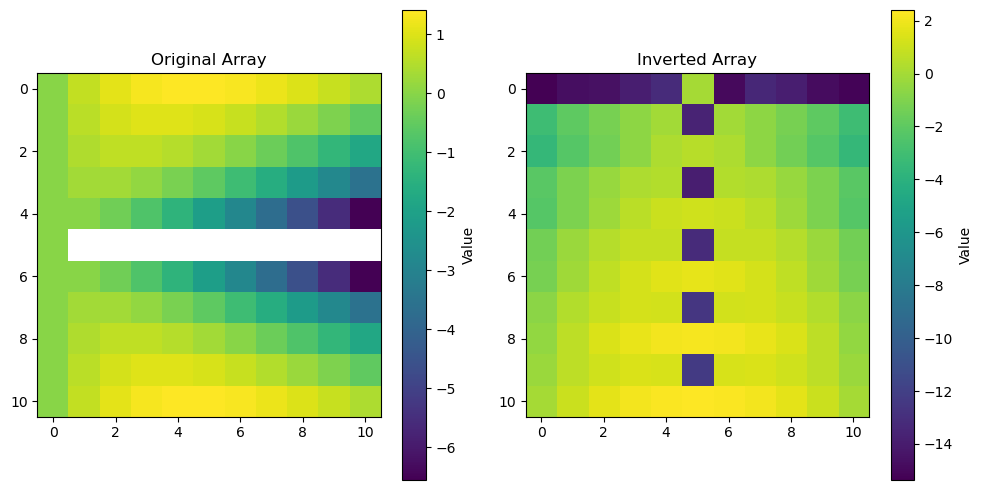

In [48]:
n = 5
pts = np.arange(-n,n+1)
a = differentiation_matrix_1d(pts)
inv_a = np.linalg.inv(a)

aa,aa_inv = np.log10(np.abs(a)),np.log10(np.abs(inv_a))
# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
img1 = ax1.imshow(aa, cmap='viridis')
ax1.set_title('Original Array')
plt.colorbar(img1, ax=ax1, label='Value')

# Display the inverted image
img2 = ax2.imshow(aa_inv, cmap='viridis')
ax2.set_title('Inverted Array')
plt.colorbar(img2, ax=ax2, label='Value')

# Show the plot
plt.tight_layout()
plt.show()

# LLM generated references

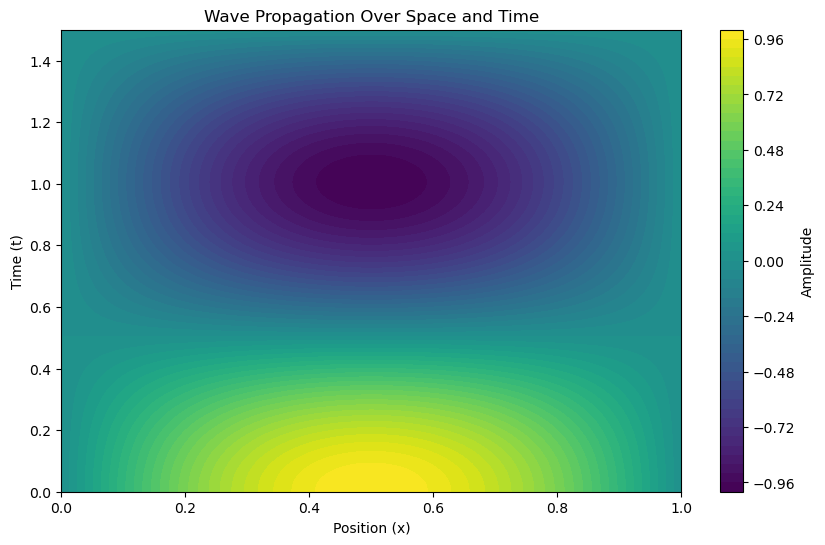

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0            # Length of the string
c = 1.0            # Wave speed
nx = 100           # Number of spatial points
nt = 300           # Number of time points
dx = L / (nx - 1)  # Spatial step size
dt = 0.005         # Time step size (should satisfy the CFL condition)

# Initialize wave function
u = np.zeros((nx, nt))  # Solution matrix
x = np.linspace(0, L, nx)  # Spatial domain
t = np.linspace(0, nt*dt, nt)  # Time domain

# Initial condition: u(x,0) = sin(pi*x)
u[:, 0] = np.sin(np.pi * x)

# Finite difference method for wave equation solution
# Second time step using initial condition assumption
u[:, 1] = u[:, 0]

for n in range(1, nt - 1):
    for i in range(1, nx - 1):
        u[i, n + 1] = (2 * u[i, n] - u[i, n - 1] +
                       (c * dt / dx) ** 2 * (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n]))

# Plotting the results
X, T = np.meshgrid(x, t)  # Correct this order to match dimensions

plt.figure(figsize=(10, 6))
plt.contourf(X, T, u.T, levels=50, cmap='viridis')  # u.T shape should match X and T
plt.colorbar(label='Amplitude')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Wave Propagation Over Space and Time')
plt.show()

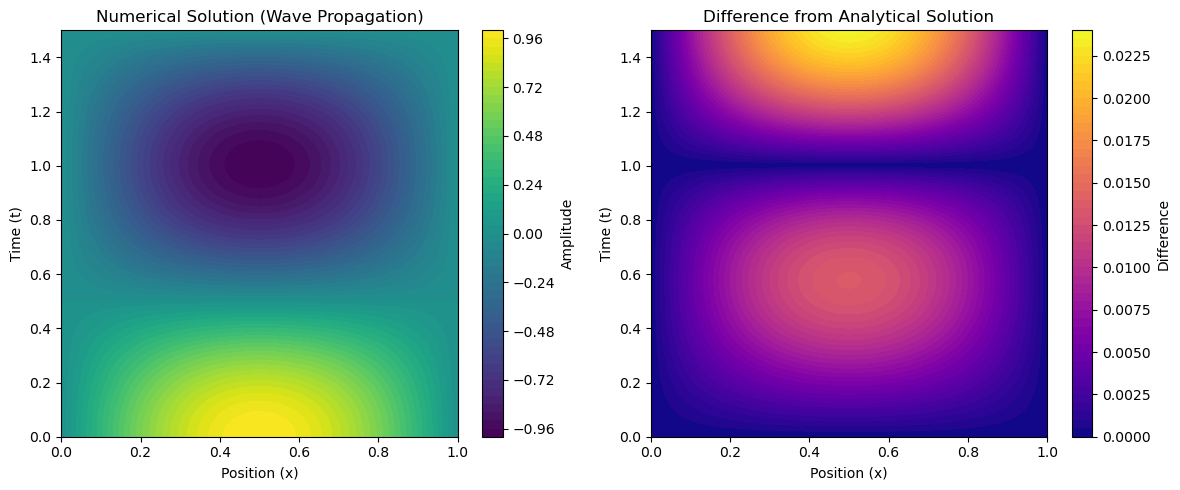

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class WaveEquationSolver:
    def __init__(self, L=1.0, c=1.0, nx=100, nt=300, dt=0.005, boundary_condition='periodic'):
        self.L = L
        self.c = c
        self.nx = nx
        self.nt = nt
        self.dx = L / (nx - 1)
        self.dt = dt
        self.x = np.linspace(0, L, nx)
        self.t = np.linspace(0, nt * dt, nt)
        self.boundary_condition = boundary_condition
        self.u = np.zeros((nx, nt))
        self.u[:, 0] = np.sin(np.pi * self.x)  # Initial condition

    def apply_boundary_conditions(self, u):
        if self.boundary_condition == 'dirichlet':
            u[0, :] = 0
            u[-1, :] = 0
        elif self.boundary_condition == 'neumann':
            u[0, :] = u[1, :]
            u[-1, :] = u[-2, :]
        elif self.boundary_condition == 'periodic':
            u[0, :] = u[-2, :]
            u[-1, :] = u[1, :]

    def solve(self, method='fdm'):
        if method == 'fdm':  # Finite Difference Method
            u = self.u.copy()
            u[:, 1] = u[:, 0]
            self.apply_boundary_conditions(u)
            for n in range(1, self.nt - 1):
                for i in range(1, self.nx - 1):
                    u[i, n + 1] = (2 * u[i, n] - u[i, n - 1] +
                                   (self.c * self.dt / self.dx) ** 2 * (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n]))
                self.apply_boundary_conditions(u)
            self.u = u
        else:
            raise ValueError("Unsupported method. Try 'fdm'.")

    def analytical_solution(self):
        U_exact = np.zeros((self.nx, self.nt))
        for n in range(self.nt):
            U_exact[:, n] = np.sin(np.pi * self.x) * np.cos(np.pi * self.c * self.t[n])
        return U_exact

    def plot_results(self):
        X, T = np.meshgrid(self.x, self.t)
        
        # Plot numerical solution
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.contourf(X, T, self.u.T, levels=50, cmap='viridis')
        plt.colorbar(label='Amplitude')
        plt.xlabel('Position (x)')
        plt.ylabel('Time (t)')
        plt.title('Numerical Solution (Wave Propagation)')

        # Plot difference with analytical solution
        analytical_u = self.analytical_solution()
        difference = np.abs(self.u - analytical_u)
        
        plt.subplot(1, 2, 2)
        plt.contourf(X, T, difference.T, levels=50, cmap='plasma')
        plt.colorbar(label='Difference')
        plt.xlabel('Position (x)')
        plt.ylabel('Time (t)')
        plt.title('Difference from Analytical Solution')

        plt.tight_layout()
        plt.show()

# Usage
solver = WaveEquationSolver(boundary_condition='dirichlet')
solver.solve(method='fdm')
solver.plot_results()